In [1]:
# load dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the cleaned_crime_data.csv file into a pandas dataframe
df = pd.read_csv('../Resources/cleaned_crime_data.csv')


In [3]:
df.head()


,ds,ofns_desc,boro_nm,susp_age_group,susp_race,susp_sex,vic_age_group,vic_race,vic_sex
0,2010-01-01 00:00:00,RAPE,BROOKLYN,25-44,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
1,2010-01-01 00:00:00,SEX CRIMES,BROOKLYN,18-24,UNKNOWN,F,<18,UNKNOWN,F
2,2010-01-01 00:00:00,OFF. AGNST PUB ORD SENSBLTY &,BRONX,25-44,WHITE HISPANIC,F,18-24,WHITE HISPANIC,F
3,2010-01-01 00:00:00,SEX CRIMES,BRONX,UNKNOWN,WHITE HISPANIC,M,<18,WHITE HISPANIC,F
4,2010-01-01 00:00:00,CRIMINAL MISCHIEF & RELATED OF,BROOKLYN,(null),(null),(null),(null),UNKNOWN,D


In [4]:
# Remove all columns exept ds and ofns_desc
daily_offenses_df = df[['ds', 'ofns_desc']]
daily_offenses_df.head()


,ds,ofns_desc
0,2010-01-01 00:00:00,RAPE
1,2010-01-01 00:00:00,SEX CRIMES
2,2010-01-01 00:00:00,OFF. AGNST PUB ORD SENSBLTY &
3,2010-01-01 00:00:00,SEX CRIMES
4,2010-01-01 00:00:00,CRIMINAL MISCHIEF & RELATED OF


In [5]:
# Konvertovanje 'ds' kolone u datetime format, ako već nije
daily_offenses_df['ds'] = pd.to_datetime(daily_offenses_df['ds']).dt.date

# Grupisanje po datumu i opisu ofenzive, zatim brojanje slučajeva
daily_cases = daily_offenses_df.groupby('ds').size().reset_index(name='number_of_cases')

# Prikaz rezultata
print(daily_cases)

# Ako želite da sačuvate novi DataFrame u CSV fajl
# grouped.to_csv('daily_offense_cases.csv', index=False)





C:\Users\abeli\AppData\Local\Temp\ipykernel_18244\3114511650.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_offenses_df['ds'] = pd.to_datetime(daily_offenses_df['ds']).dt.date


              ds  number_of_cases
0     2010-01-01             2497
1     2010-01-02             1180
2     2010-01-03             1047
3     2010-01-04             1218
4     2010-01-05             1353
...          ...              ...
4743  2022-12-27             1131
4744  2022-12-28             1179
4745  2022-12-29             1159
4746  2022-12-30             1140
4747  2022-12-31              868

[4748 rows x 2 columns]


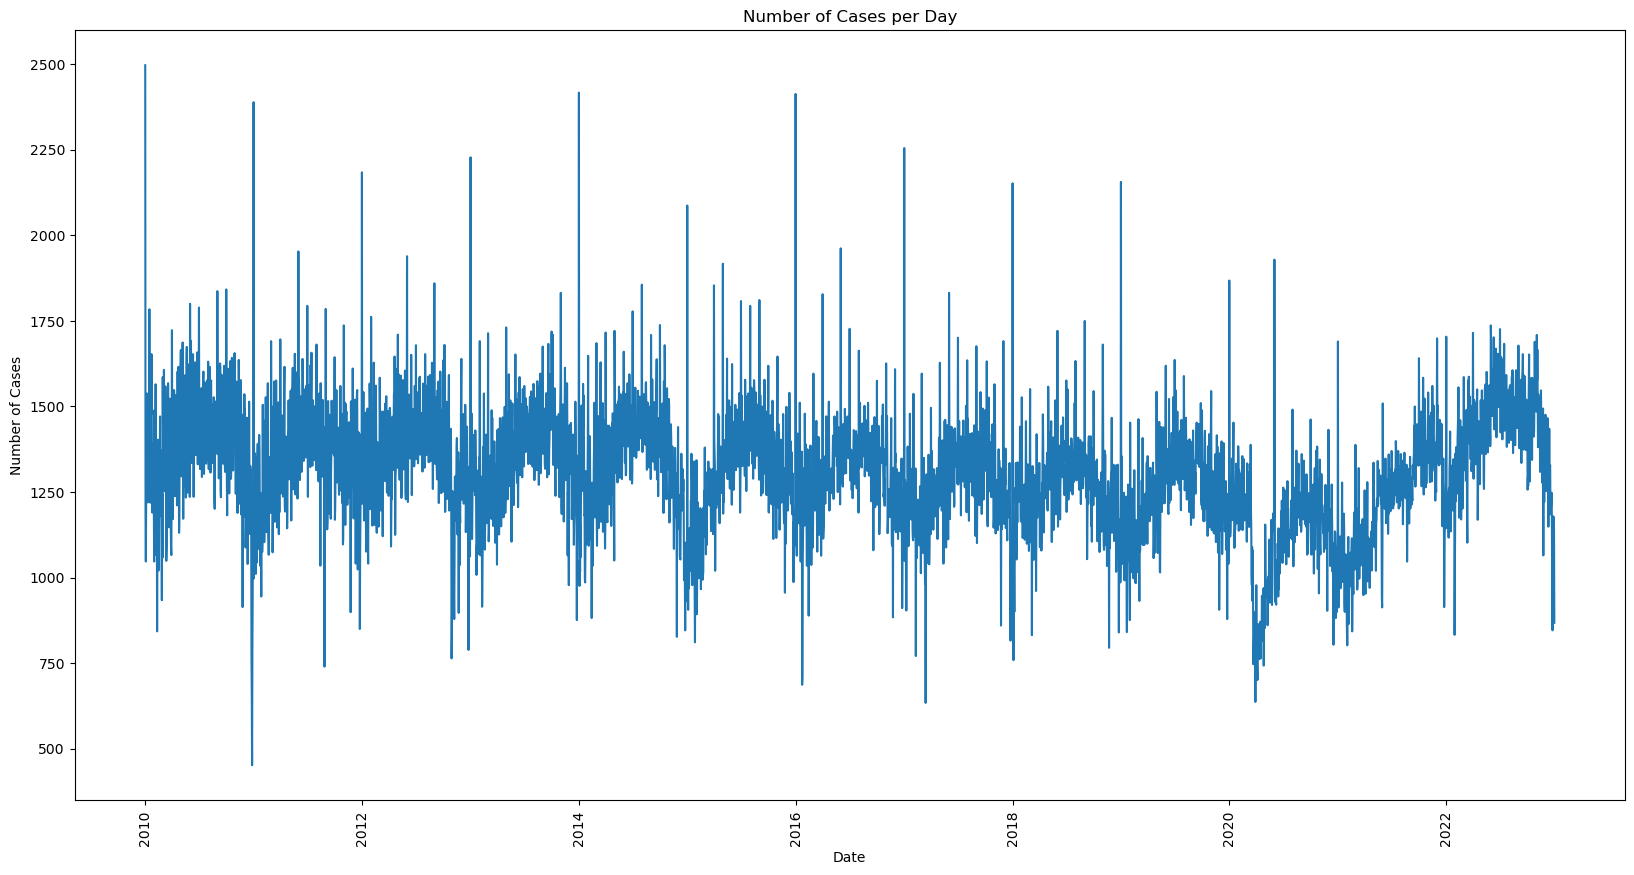

In [7]:
# plot the number of cases per day
plt.figure(figsize=(20,10))
plt.plot(daily_cases['ds'], daily_cases['number_of_cases'])
plt.title('Number of Cases per Day')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()


In [13]:
daily_cases_df = daily_cases.copy()

In [15]:
daily_cases_df

,number_of_cases
ds,
2010-01-01,2497
2010-01-02,1180
2010-01-03,1047
2010-01-04,1218
2010-01-05,1353
...,...
2022-12-27,1131
2022-12-28,1179
2022-12-29,1159


In [16]:
import pandas as pd

# Pretvaranje indeksa 'ds' u kolonu (ako već nije kolona)
daily_cases_df.reset_index(inplace=True)

# Ako 'ds' nije u datetime formatu, konvertujemo ga
daily_cases_df['ds'] = pd.to_datetime(daily_cases_df['ds'])

# Izvlačenje godine i meseca iz 'ds' i kreiranje nove kolone 'year_month'
daily_cases_df['year_month'] = daily_cases_df['ds'].dt.to_period('M')

# Grupisanje podataka po 'year_month' i sumiranje slučajeva za svaki mesec
monthly_cases_df = daily_cases_df.groupby('year_month')['number_of_cases'].sum().reset_index()

# Prikaz rezultata
print(monthly_cases_df)

# Ako želite da sačuvate rezultate u CSV fajl
# monthly_cases_df.to_csv('monthly_cases_summary.csv', index=False)


    year_month  number_of_cases
0      2010-01            43075
1      2010-02            34199
2      2010-03            42558
3      2010-04            42922
4      2010-05            44926
..         ...              ...
151    2022-08            46485
152    2022-09            44851
153    2022-10            45776
154    2022-11            43176
155    2022-12            38428

[156 rows x 2 columns]


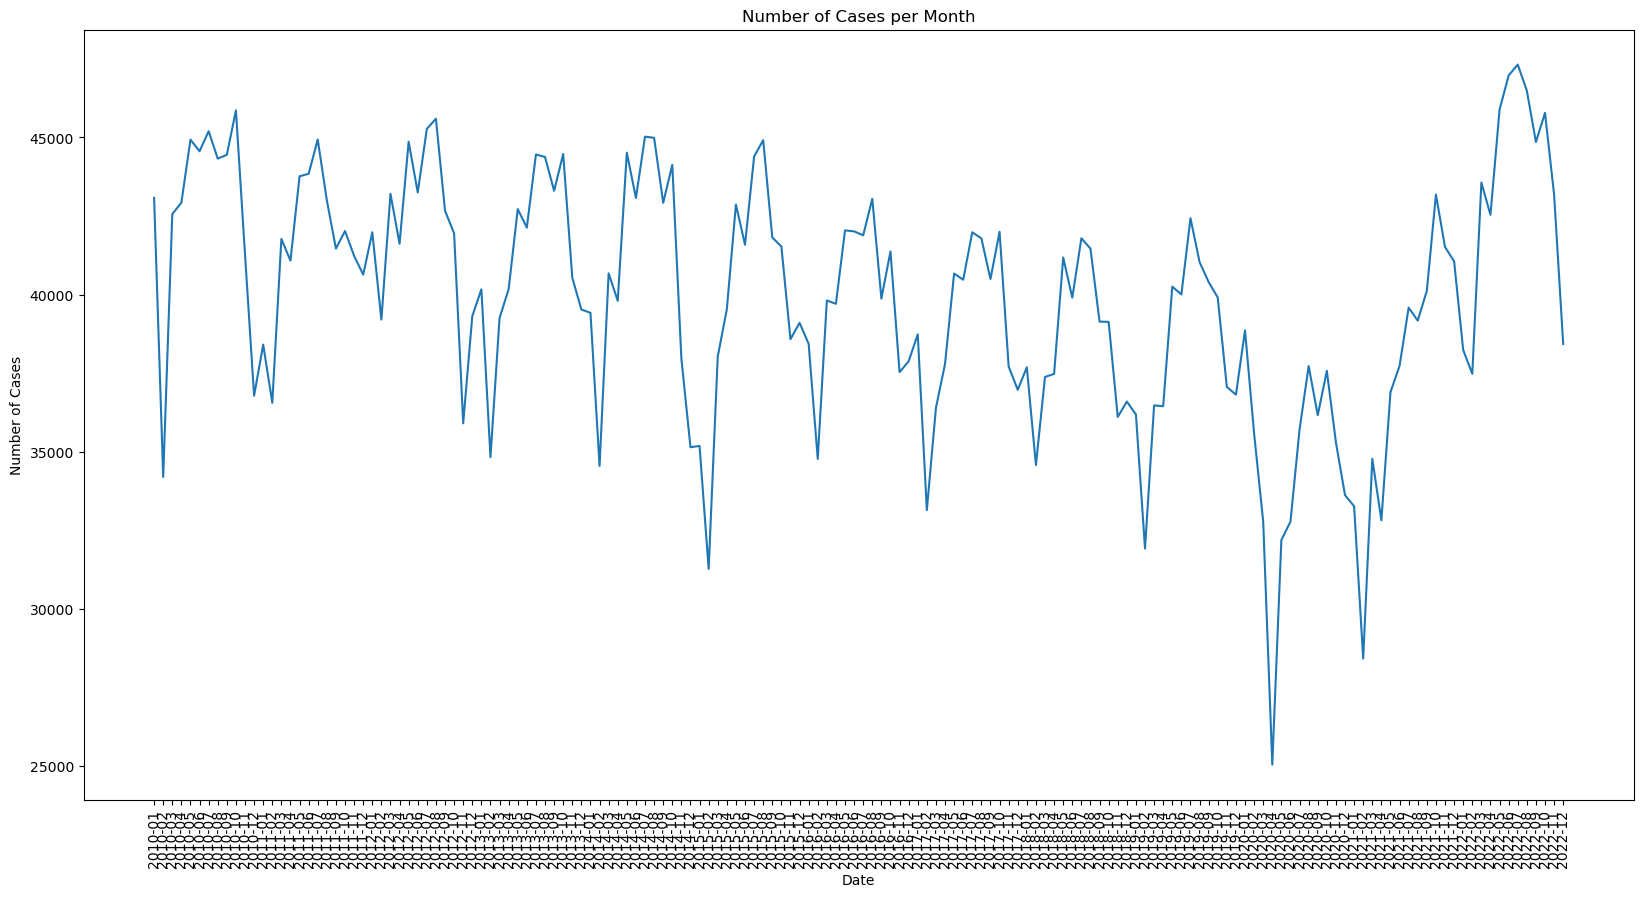

In [18]:
# Convert 'year_month' column to string type
monthly_cases_df['year_month'] = monthly_cases_df['year_month'].astype(str)

# Plot the number of cases per month
plt.figure(figsize=(20,10))
plt.plot(monthly_cases_df['year_month'], monthly_cases_df['number_of_cases'])
plt.title('Number of Cases per Month')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()


In [19]:
yearly_cases_df = monthly_cases_df.copy()

In [20]:
yearly_cases_df

,year_month,number_of_cases
0,2010-01,43075
1,2010-02,34199
2,2010-03,42558
3,2010-04,42922
4,2010-05,44926
...,...,...
151,2022-08,46485
152,2022-09,44851
153,2022-10,45776
154,2022-11,43176


In [21]:
# Pretpostavimo da 'monthly_cases_df' je vaš DataFrame

# Prvo, pretvorimo 'year_month' u string ako već nije, da bismo mogli da izdvojimo godinu
monthly_cases_df['year'] = monthly_cases_df['year_month'].apply(lambda x: x.split('-')[0])

# Zatim, grupišemo podatke po 'year' i sumiramo 'number_of_cases'
yearly_cases_df = monthly_cases_df.groupby('year')['number_of_cases'].sum().reset_index()

# Prikazujemo rezultat
print(yearly_cases_df)


    year  number_of_cases
0   2010           510109
1   2011           498688
2   2012           504794
3   2013           495919
4   2014           492183
5   2015           478790
6   2016           478349
7   2017           468135
8   2018           462420
9   2019           458925
10  2020           413329
11  2021           448540
12  2022           520687


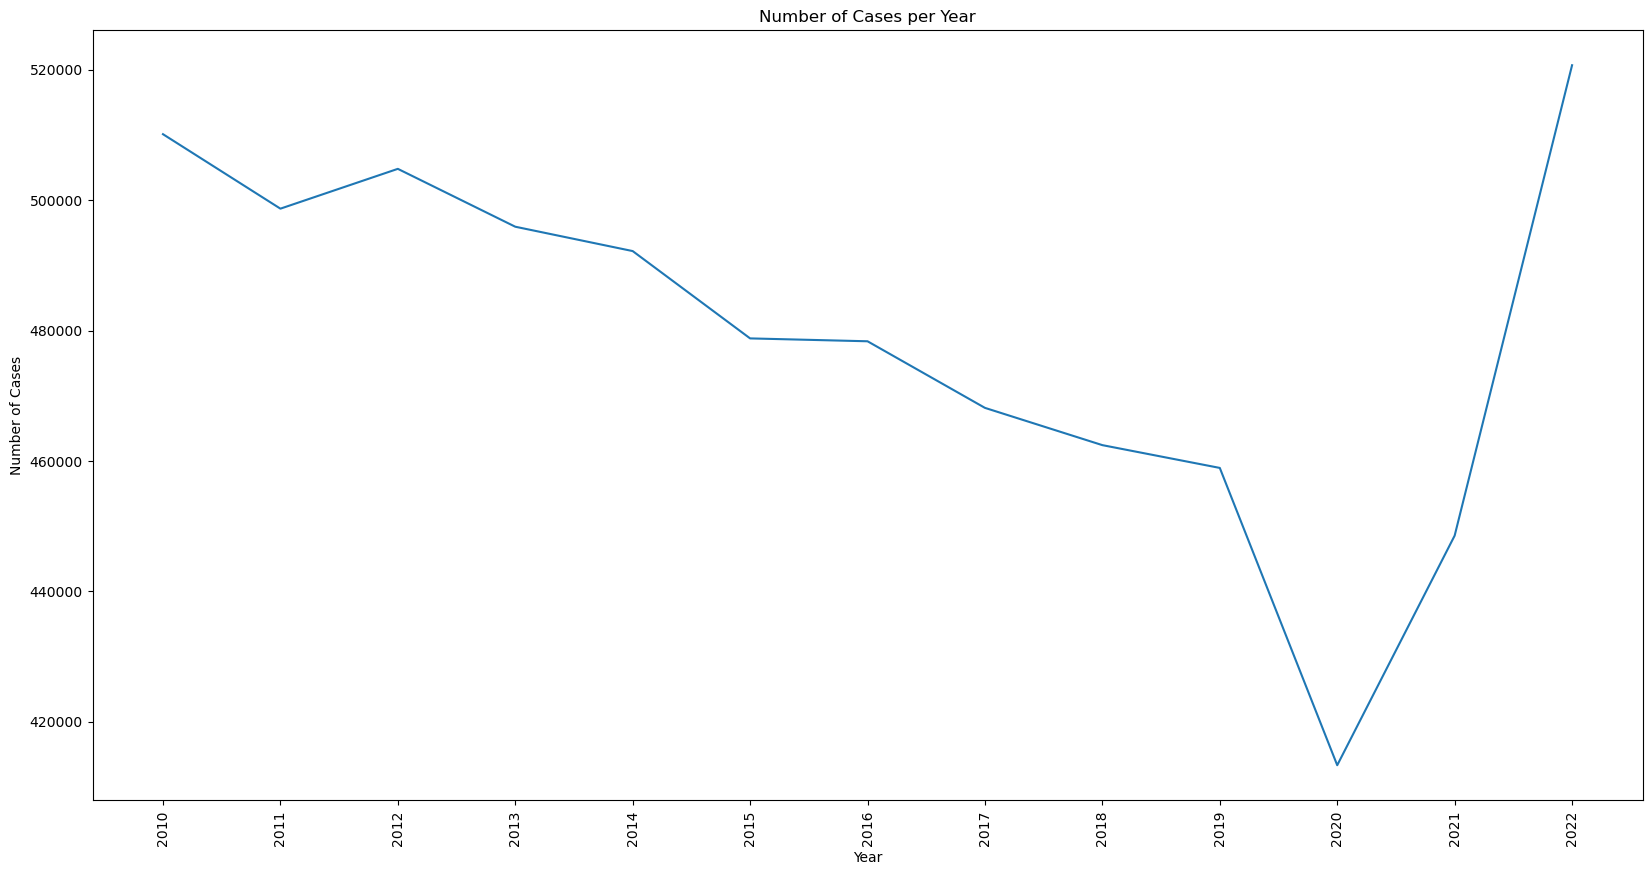

In [22]:
# plot the number of cases per year
plt.figure(figsize=(20,10))
plt.plot(yearly_cases_df['year'], yearly_cases_df['number_of_cases'])
plt.title('Number of Cases per Year')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=90)
plt.show()


In [23]:
# Percentage of change in the number of cases per year
yearly_cases_df['percentage_change'] = yearly_cases_df['number_of_cases'].pct_change() * 100
yearly_cases_df

,year,number_of_cases,percentage_change
0,2010,510109,NaN
1,2011,498688,-2.238933
2,2012,504794,1.224413
3,2013,495919,-1.758143
4,2014,492183,-0.753349
5,2015,478790,-2.721142
6,2016,478349,-0.092107
7,2017,468135,-2.135261
8,2018,462420,-1.220802
9,2019,458925,-0.755806


In [24]:
# Calculate the percentage change in the number of cases per year
yearly_cases_df['trendiness'] = yearly_cases_df['number_of_cases'].pct_change() * 100
yearly_cases_df


,year,number_of_cases,percentage_change,trendiness
0,2010,510109,NaN,NaN
1,2011,498688,-2.238933,-2.238933
2,2012,504794,1.224413,1.224413
3,2013,495919,-1.758143,-1.758143
4,2014,492183,-0.753349,-0.753349
5,2015,478790,-2.721142,-2.721142
6,2016,478349,-0.092107,-0.092107
7,2017,468135,-2.135261,-2.135261
8,2018,462420,-1.220802,-1.220802
9,2019,458925,-0.755806,-0.755806


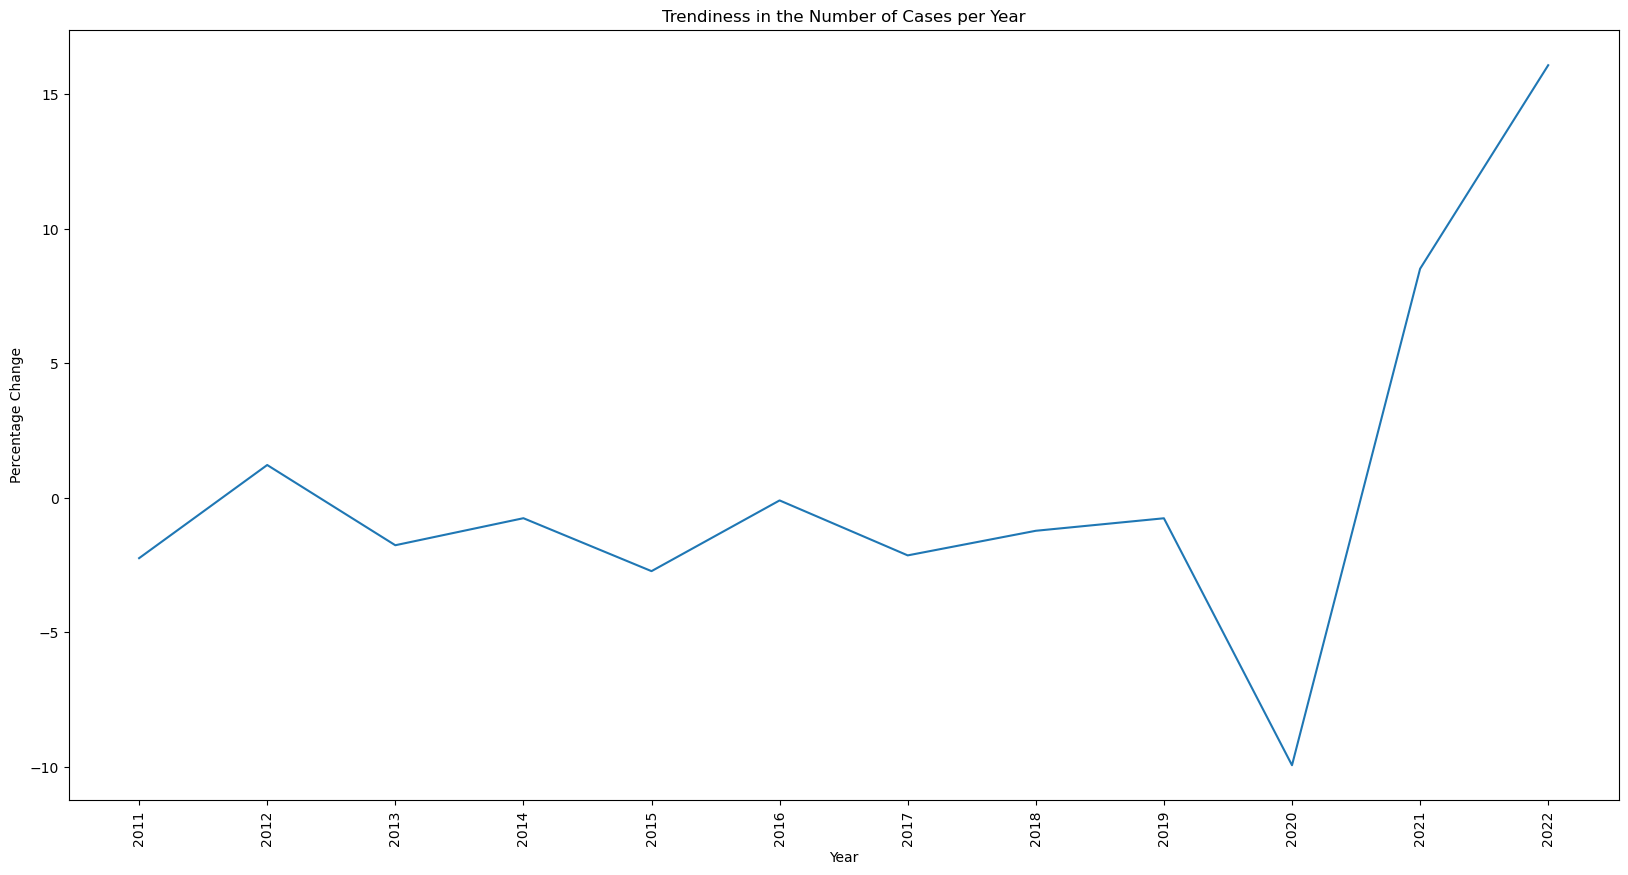

In [25]:
# Plot trendiness
plt.figure(figsize=(20,10))
plt.plot(yearly_cases_df['year'], yearly_cases_df['trendiness'])
plt.title('Trendiness in the Number of Cases per Year')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.xticks(rotation=90)
plt.show()


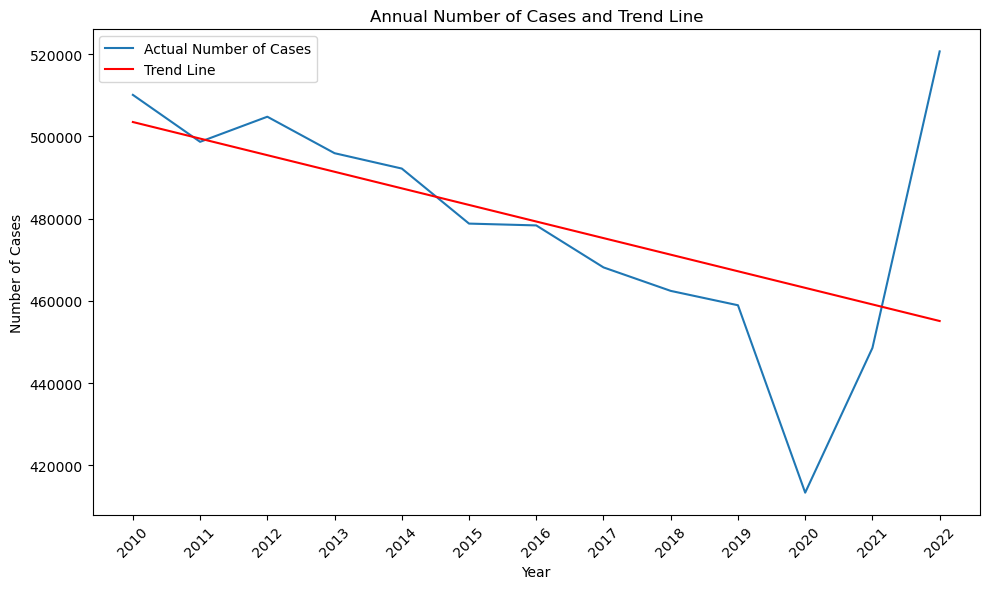

Slope: -4034.587912087913
Intercept: 8613026.769230772
P-value: 0.058167038167714145
R-squared: 0.2889100172682514


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Assuming 'yearly_cases_df' is your DataFrame

# Convert year to a numeric format that can be used for regression
yearly_cases_df['year_numeric'] = pd.to_numeric(yearly_cases_df['year'])

# Calculating linear regression
slope, intercept, r_value, p_value, std_err = linregress(yearly_cases_df['year_numeric'], yearly_cases_df['number_of_cases'])

# Adding trend line to the dataset
yearly_cases_df['trend'] = intercept + slope * yearly_cases_df['year_numeric']

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(yearly_cases_df['year'], yearly_cases_df['number_of_cases'], label='Actual Number of Cases')
plt.plot(yearly_cases_df['year'], yearly_cases_df['trend'], label='Trend Line', color='red')

plt.title('Annual Number of Cases and Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Displaying results of the linear regression
print(f"Slope: {slope}\nIntercept: {intercept}\nP-value: {p_value}\nR-squared: {r_value**2}")
